# Depth-first search (DFS) 

Depth-first search enumerates paths (from the source node) until it finds a solution (target node) prioritizing the deepest (longest) paths and limiting the maximum depth (only finite paths). 

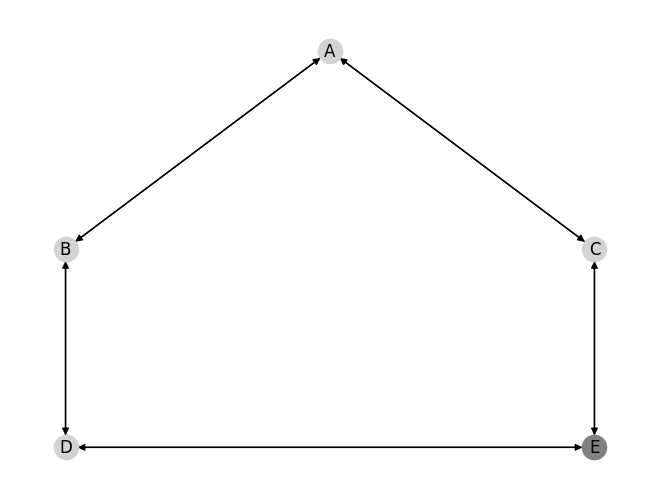

In [2]:
import networkx as nx
# G is a graph represented as an adjancency list. 
# G is a hash table (dictionary) with each node as a key, and value, the list of adjacent nodes
G={'A':['B','C'],'B':['A','D'],'C':['A','E'],'D':['B','E'],'E':['C','D']}
source='A'
Target=['E']
nxG=nx.DiGraph(G)
#pos_nodes = nx.nx_agraph.pygraphviz_layout(nxG,prog='dot',root=source)
pos_nodes = {'A': (20, 300), 'B': (10, 200), 'C': (30, 200), 'D': (10, 100), 'E': (30, 100)}
nx.draw(nxG,pos=pos_nodes, with_labels=True, node_color="lightgray")
nx.draw_networkx_nodes(G,pos=pos_nodes, nodelist=Target, node_color='gray')


## DFS algorithm with maximum depth m (backtracking version - tree search)
BT(G, s, m)  
> if Target(s) return s  
> if m = 0 return NULL  
> n = FirstAdjacent(G,s)  
> while n $\neq$ NULL
>>  r = BT(G, n, m-1)  
>>  if r $\neq$ NULL return r  
>>  n = NextAdjacent(G, s, n)  
> return NULL

### DFS implementation returning the target node that was reached

In [3]:
# G is a graph represented as an adjancency list. 
# s is the label (string) of the node to be visited
# m is the maximum depth in the search
# Target is the list of target nodes
def bt(G, s, m, Target):
  if s in Target: 
    return s
  if m == 0:
    return None
  for n in iter(G[s]):
    r = bt(G, n, m-1, Target)
    if r != None:
      return r
  return None
      
print(bt(G,'A',3,Target))

E


### DFS implementation returning the path to the source node

In [5]:
def bt(G, s, m, Target):
  if s in Target: 
    return [s]
  if m == 0:
    return None
  for n in iter(G[s]):
    path = bt(G, n, m-1, Target)
    if path != None:
      return [s]+path
  return None
      
print(bt(G,'A',3,Target))

['A', 'B', 'D', 'E']


### DFS implementation graphically showing the sequence of nodes visited

['A', 'B', 'D', 'E']


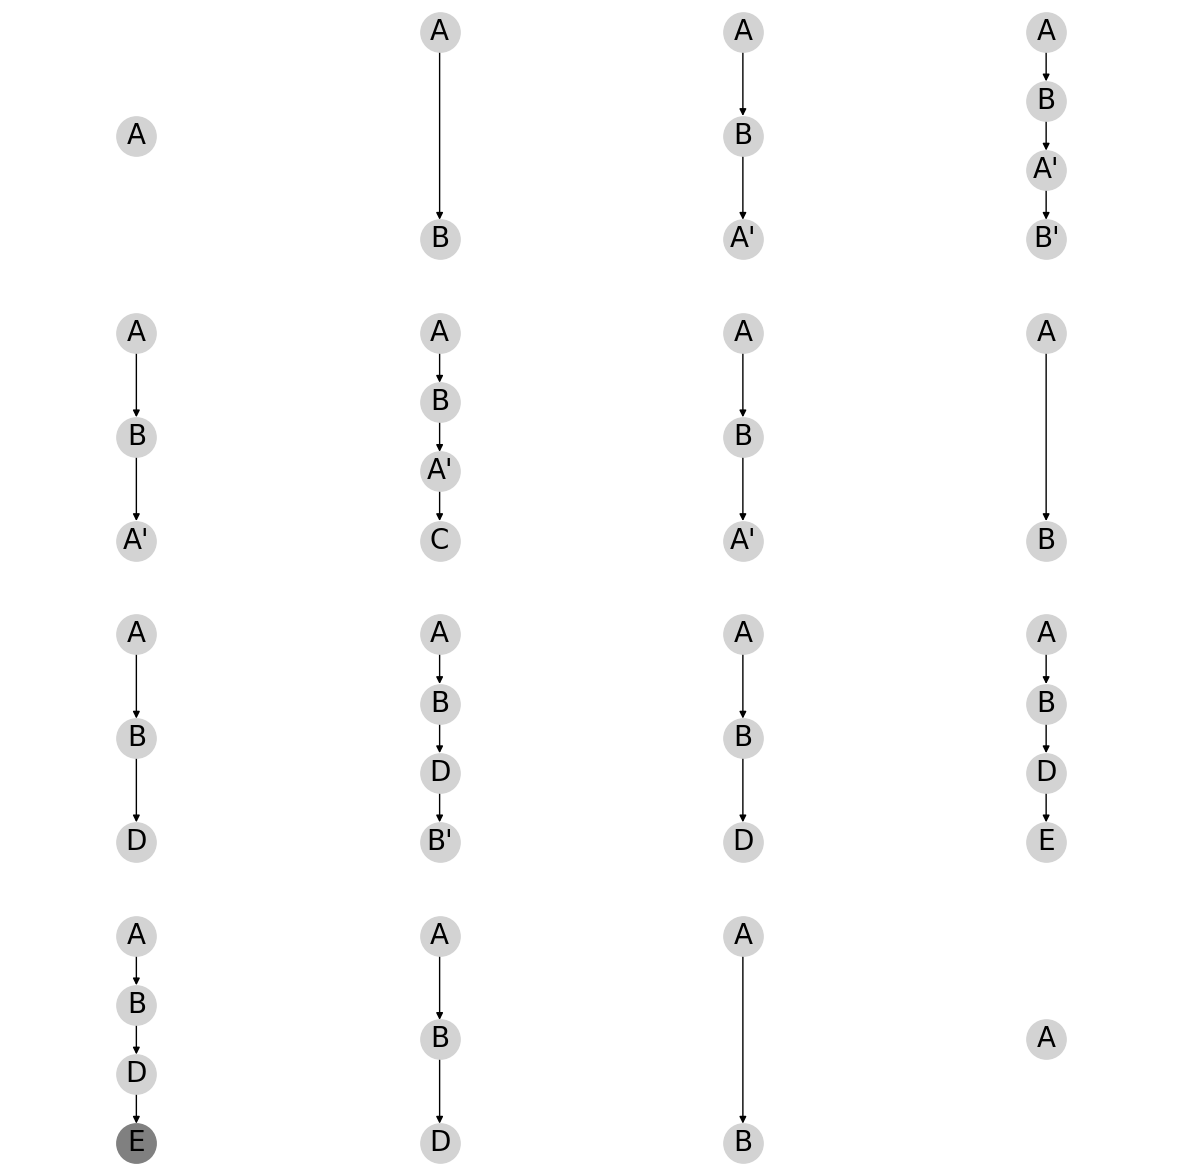

In [6]:
import matplotlib.pyplot as plt

nrows=4; ncols=4
fig, _ = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = iter(fig.axes)

def draw_graph(DG, source, target=[],):
  nxDG=nx.DiGraph(DG)
  ax = next(axes)
  pos_nodes = nx.nx_agraph.pygraphviz_layout(nxDG,prog='dot',root=source)
  nx.draw(nxDG,pos=pos_nodes, ax=ax, with_labels=True, node_color="lightgray", node_size=800, font_size=20)
  nx.draw_networkx_nodes(DG,pos=pos_nodes, ax=ax, nodelist=target, node_color='gray', node_size=800)

def bt(G, s, m, Target):
  if s[0] in Target:
    draw_graph(DG, source, [s])
    return [s]
  if m == 0:
    return None
  Adj = DG[s]
  for n in iter(G[s[0]]):
    while n in DG: n+="'"
    Adj.append(n); DG[s]=Adj; DG.update({n:[]})
    draw_graph(DG, source)  
    path = bt(G, n, m-1, Target)
    Adj.remove(n); DG[s]=Adj; del DG[n]
    draw_graph(DG, source)  
    if path != None:
      return [s]+path
  return None

M = 3
source = 'A'
DG={source:[]}
draw_graph(DG, source)      
print(bt(G,source,M,Target))



BT is incomplete and suboptimal  

**Complexity**: G with branching factor $b$ and maximum depth $m$ 
  
  $O(b^m)$ temporal cost and $O(m)$ spatial cost, better spatial cost than the DFS algorithm (tree search) with $O(bm)$